### Library

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Pengambilan Data

In [12]:
data = pd.read_csv('data.csv')
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17 00:00:00-05:00,0.181500,0.184404,0.181500,0.181500,10924800,0.0,0.0
1,1980-03-18 00:00:00-05:00,0.181500,0.182952,0.180048,0.180048,17068800,0.0,0.0
2,1980-03-19 00:00:00-05:00,0.184404,0.187308,0.184404,0.184404,18508800,0.0,0.0
3,1980-03-20 00:00:00-05:00,0.184403,0.186581,0.183678,0.183678,11174400,0.0,0.0
4,1980-03-21 00:00:00-05:00,0.180048,0.180048,0.177143,0.177143,12172800,0.0,0.0
...,...,...,...,...,...,...,...,...
11284,2024-12-18 00:00:00-05:00,20.480000,20.580000,19.209999,19.299999,86041200,0.0,0.0
11285,2024-12-19 00:00:00-05:00,19.530001,19.690001,19.030001,19.059999,69117800,0.0,0.0
11286,2024-12-20 00:00:00-05:00,18.969999,19.760000,18.900000,19.520000,108453700,0.0,0.0
11287,2024-12-23 00:00:00-05:00,19.580000,20.230000,19.520000,20.200001,57988400,0.0,0.0


### Preprocessing

In [13]:
data = data.ffill()

X = data.drop(['Date', 'Close'], axis=1)
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Prediksi Menggunakan Linear Regression

In [14]:
# Data Training
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, R-Squared: {r2_lr}')

Linear Regression MAE: 0.08737931699770268, MSE: 0.025668120898903187, RMSE: 0.1602127363816722, R-Squared: 0.9998823068134198


### Prediksi Menggunakan Decision Tree

In [15]:
# Data Training
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree MAE: {mae_dt}, MSE: {mse_dt}, RMSE: {rmse_dt}, R-Squared: {r2_dt}')

Decision Tree MAE: 0.13375950376439327, MSE: 0.07213474347788215, RMSE: 0.26857911958654224, R-Squared: 0.9996692485649225


### Analisis Perbandingan

In [16]:
results = {
    'Model': ['Linear Regression', 'Decision Tree'],
    'MAE': [mae_lr, mae_dt],
    'MSE': [mse_lr, mse_dt],
    'RMSE': [rmse_lr, rmse_dt],
    'R-Squared': [r2_lr, r2_dt]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model       MAE       MSE      RMSE  R-Squared
0  Linear Regression  0.087379  0.025668  0.160213   0.999882
1      Decision Tree  0.133760  0.072135  0.268579   0.999669


### Visualisasi Perbandingan LR & DT

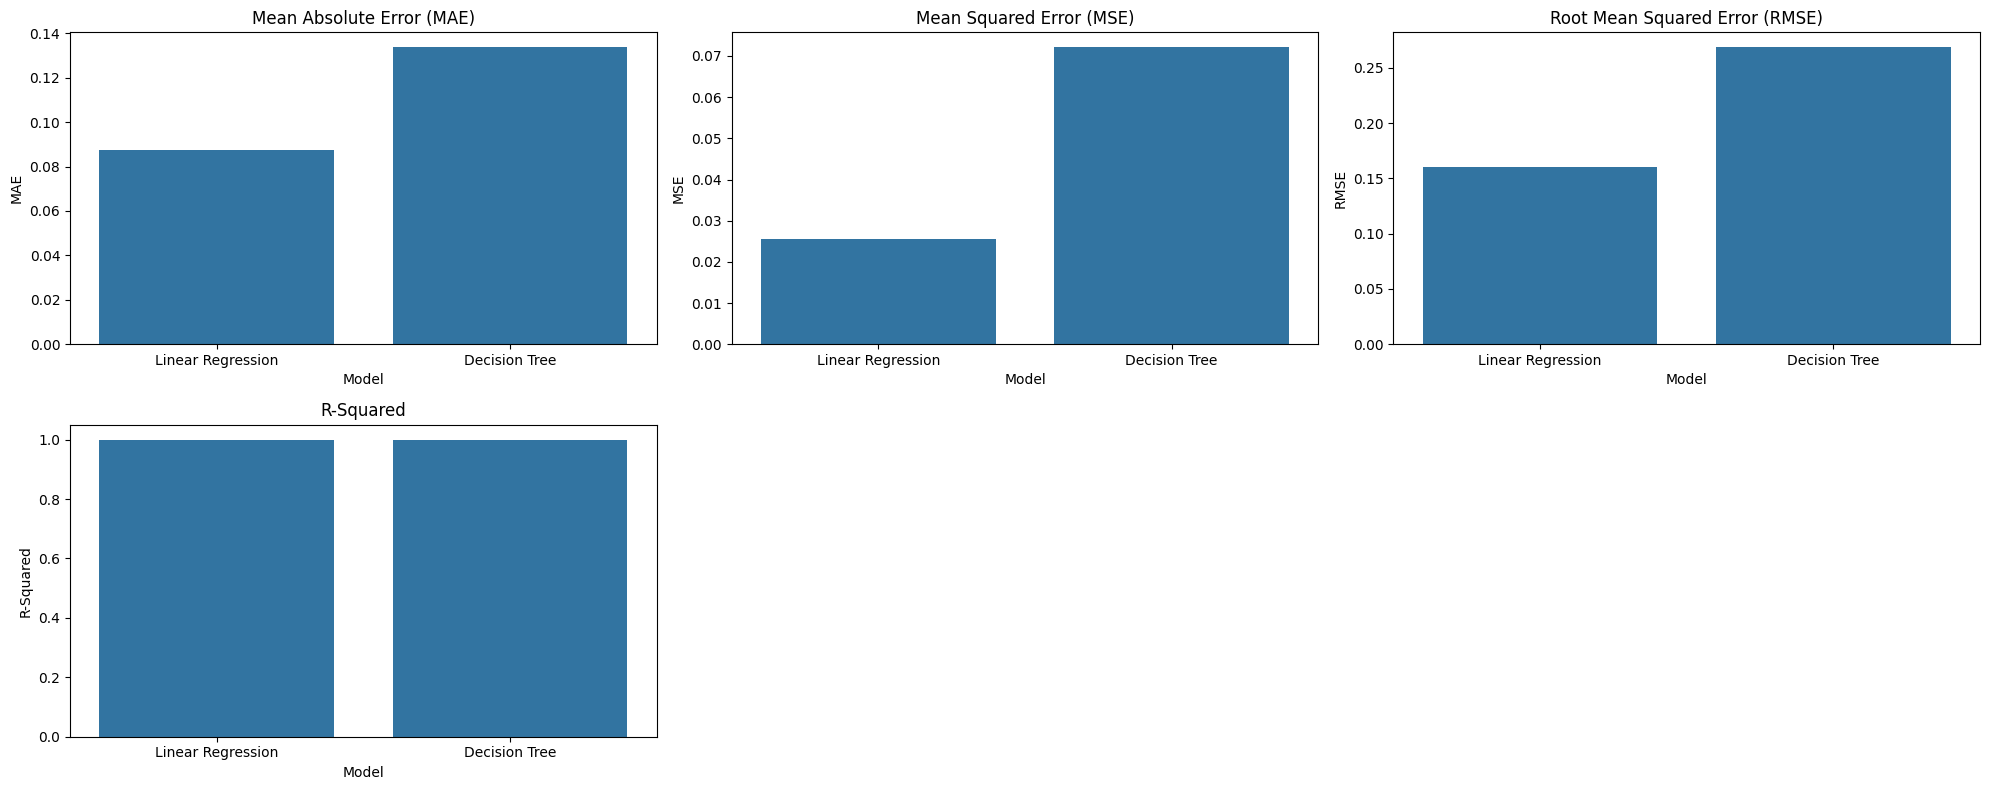

In [17]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 3, 1)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.xlabel('Model')

plt.subplot(2, 3, 2)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xlabel('Model')

plt.subplot(2, 3, 3)
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.xlabel('Model')

plt.subplot(2, 3, 4)
sns.barplot(x='Model', y='R-Squared', data=results_df)
plt.title('R-Squared')
plt.ylabel('R-Squared')
plt.xlabel('Model')

plt.tight_layout()
plt.show()

### Analisis Residual

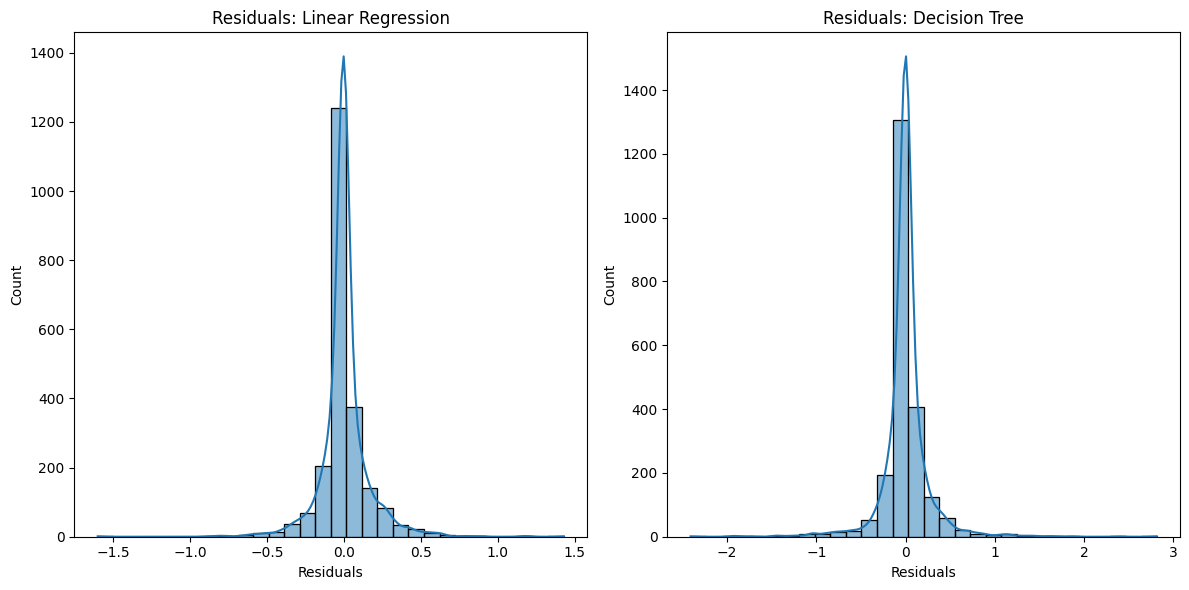

In [ ]:
residuals_lr = y_test - y_pred_lr
residuals_dt = y_test - y_pred_dt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_lr, kde=True, bins=30)
plt.title('Residuals: Linear Regression')
plt.xlabel('Residuals')

plt.subplot(1, 2, 2)
sns.histplot(residuals_dt, kde=True, bins=30)
plt.title('Residuals: Decision Tree')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()
